# Imports

In [4]:
import pandas as pd
import numpy as nd
import seaborn as sns
import matplotlib as mpl
from statsmodels import stats
from scipy import stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

# Import Dataset

In [135]:
dados = pd.read_csv('../data/HR_comma_sep.csv', sep =',')

In [6]:
dados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Analyzing the dataset

In [7]:
dados.shape

(14999, 10)

In [8]:
dados.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
dados.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


# Analyzing the impact of salaries on retention

<AxesSubplot:title={'center':'Impact of salaries on retention'}, xlabel='Salary', ylabel='count'>

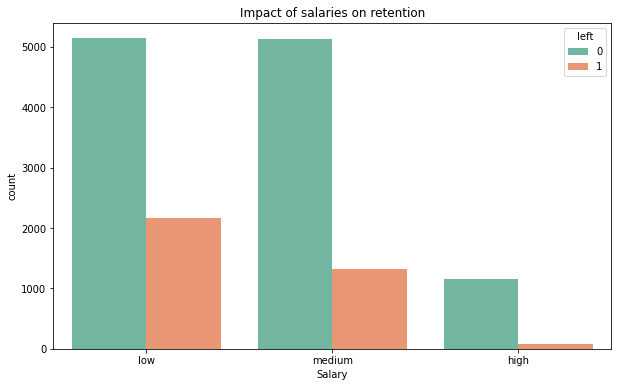

In [10]:
ax = sns.countplot(x='salary', hue='left', data=dados, palette= "Set2")
ax.figure.set_size_inches(10,6)
ax.set_title('Impact of salaries on retention')
ax.set_xlabel('Salary')
ax

 Conclusion: The salary influence the retention of employees, the people with higher salaries tend to stay in company and people with low salaries tend to left the company.

# Analyzing the impact of departments

<AxesSubplot:title={'center':'Impact of departments on retention'}, xlabel='Departments', ylabel='Left'>

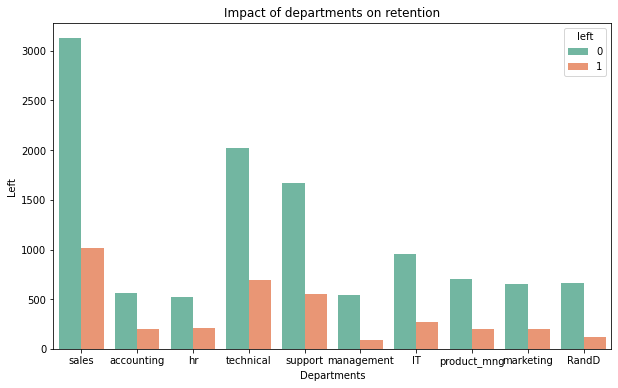

In [11]:
ax = sns.countplot(x='Department', hue='left', data=dados, palette = 'Set2')
ax.figure.set_size_inches(10,6)
ax.set_title('Impact of departments on retention')
ax.set_ylabel('Left')
ax.set_xlabel('Departments')
ax

## Analyzing the impact of the department in percentage

<AxesSubplot:title={'center':'Impact of departments on retention'}, xlabel='Departments', ylabel='Percentage'>

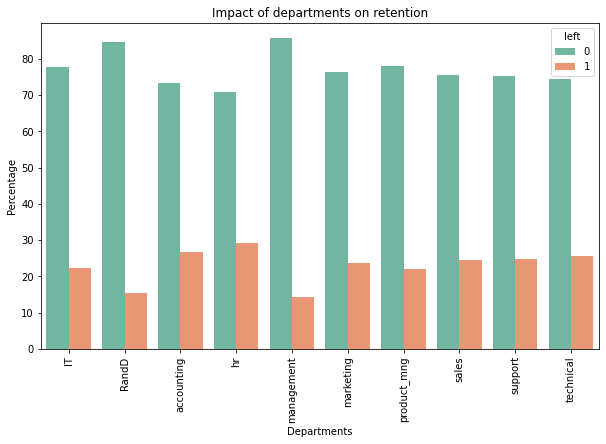

In [12]:
counts = (dados.groupby(['Department'])['left']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Department'))
p = sns.barplot(x="Department", y="Percentage", hue="left", data=counts, palette = 'Set2')
_ = plt.setp(p.get_xticklabels(), rotation=90) 
p.figure.set_size_inches(10,6)
p.set_title('Impact of departments on retention')
p.set_ylabel('Percentage')
p.set_xlabel('Departments')
p

Conclusion: The turn over from HR and accounting departments are higher then the others departments.

# Create Decision Tree Classifier

In [13]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [14]:
from sklearn.tree import plot_tree, DecisionTreeClassifier


In [16]:
y = dados['left']

In [17]:
x = dados[['time_spend_company', 'Work_accident', 'average_montly_hours', 'satisfaction_level','Department', 'salary']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

In [125]:
cat_proc = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor = make_column_transformer(
     (cat_proc, ["Department", "salary"]), remainder='passthrough'
)

clf = make_pipeline(preprocessor, (DecisionTreeClassifier(max_depth = 3, class_weight='balanced')))

In [126]:
clf.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Department', 'salary'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=3))])

In [127]:
preprocessor.fit_transform(x_train).shape


(10499, 17)

In [67]:
clf.predict(x_train)

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

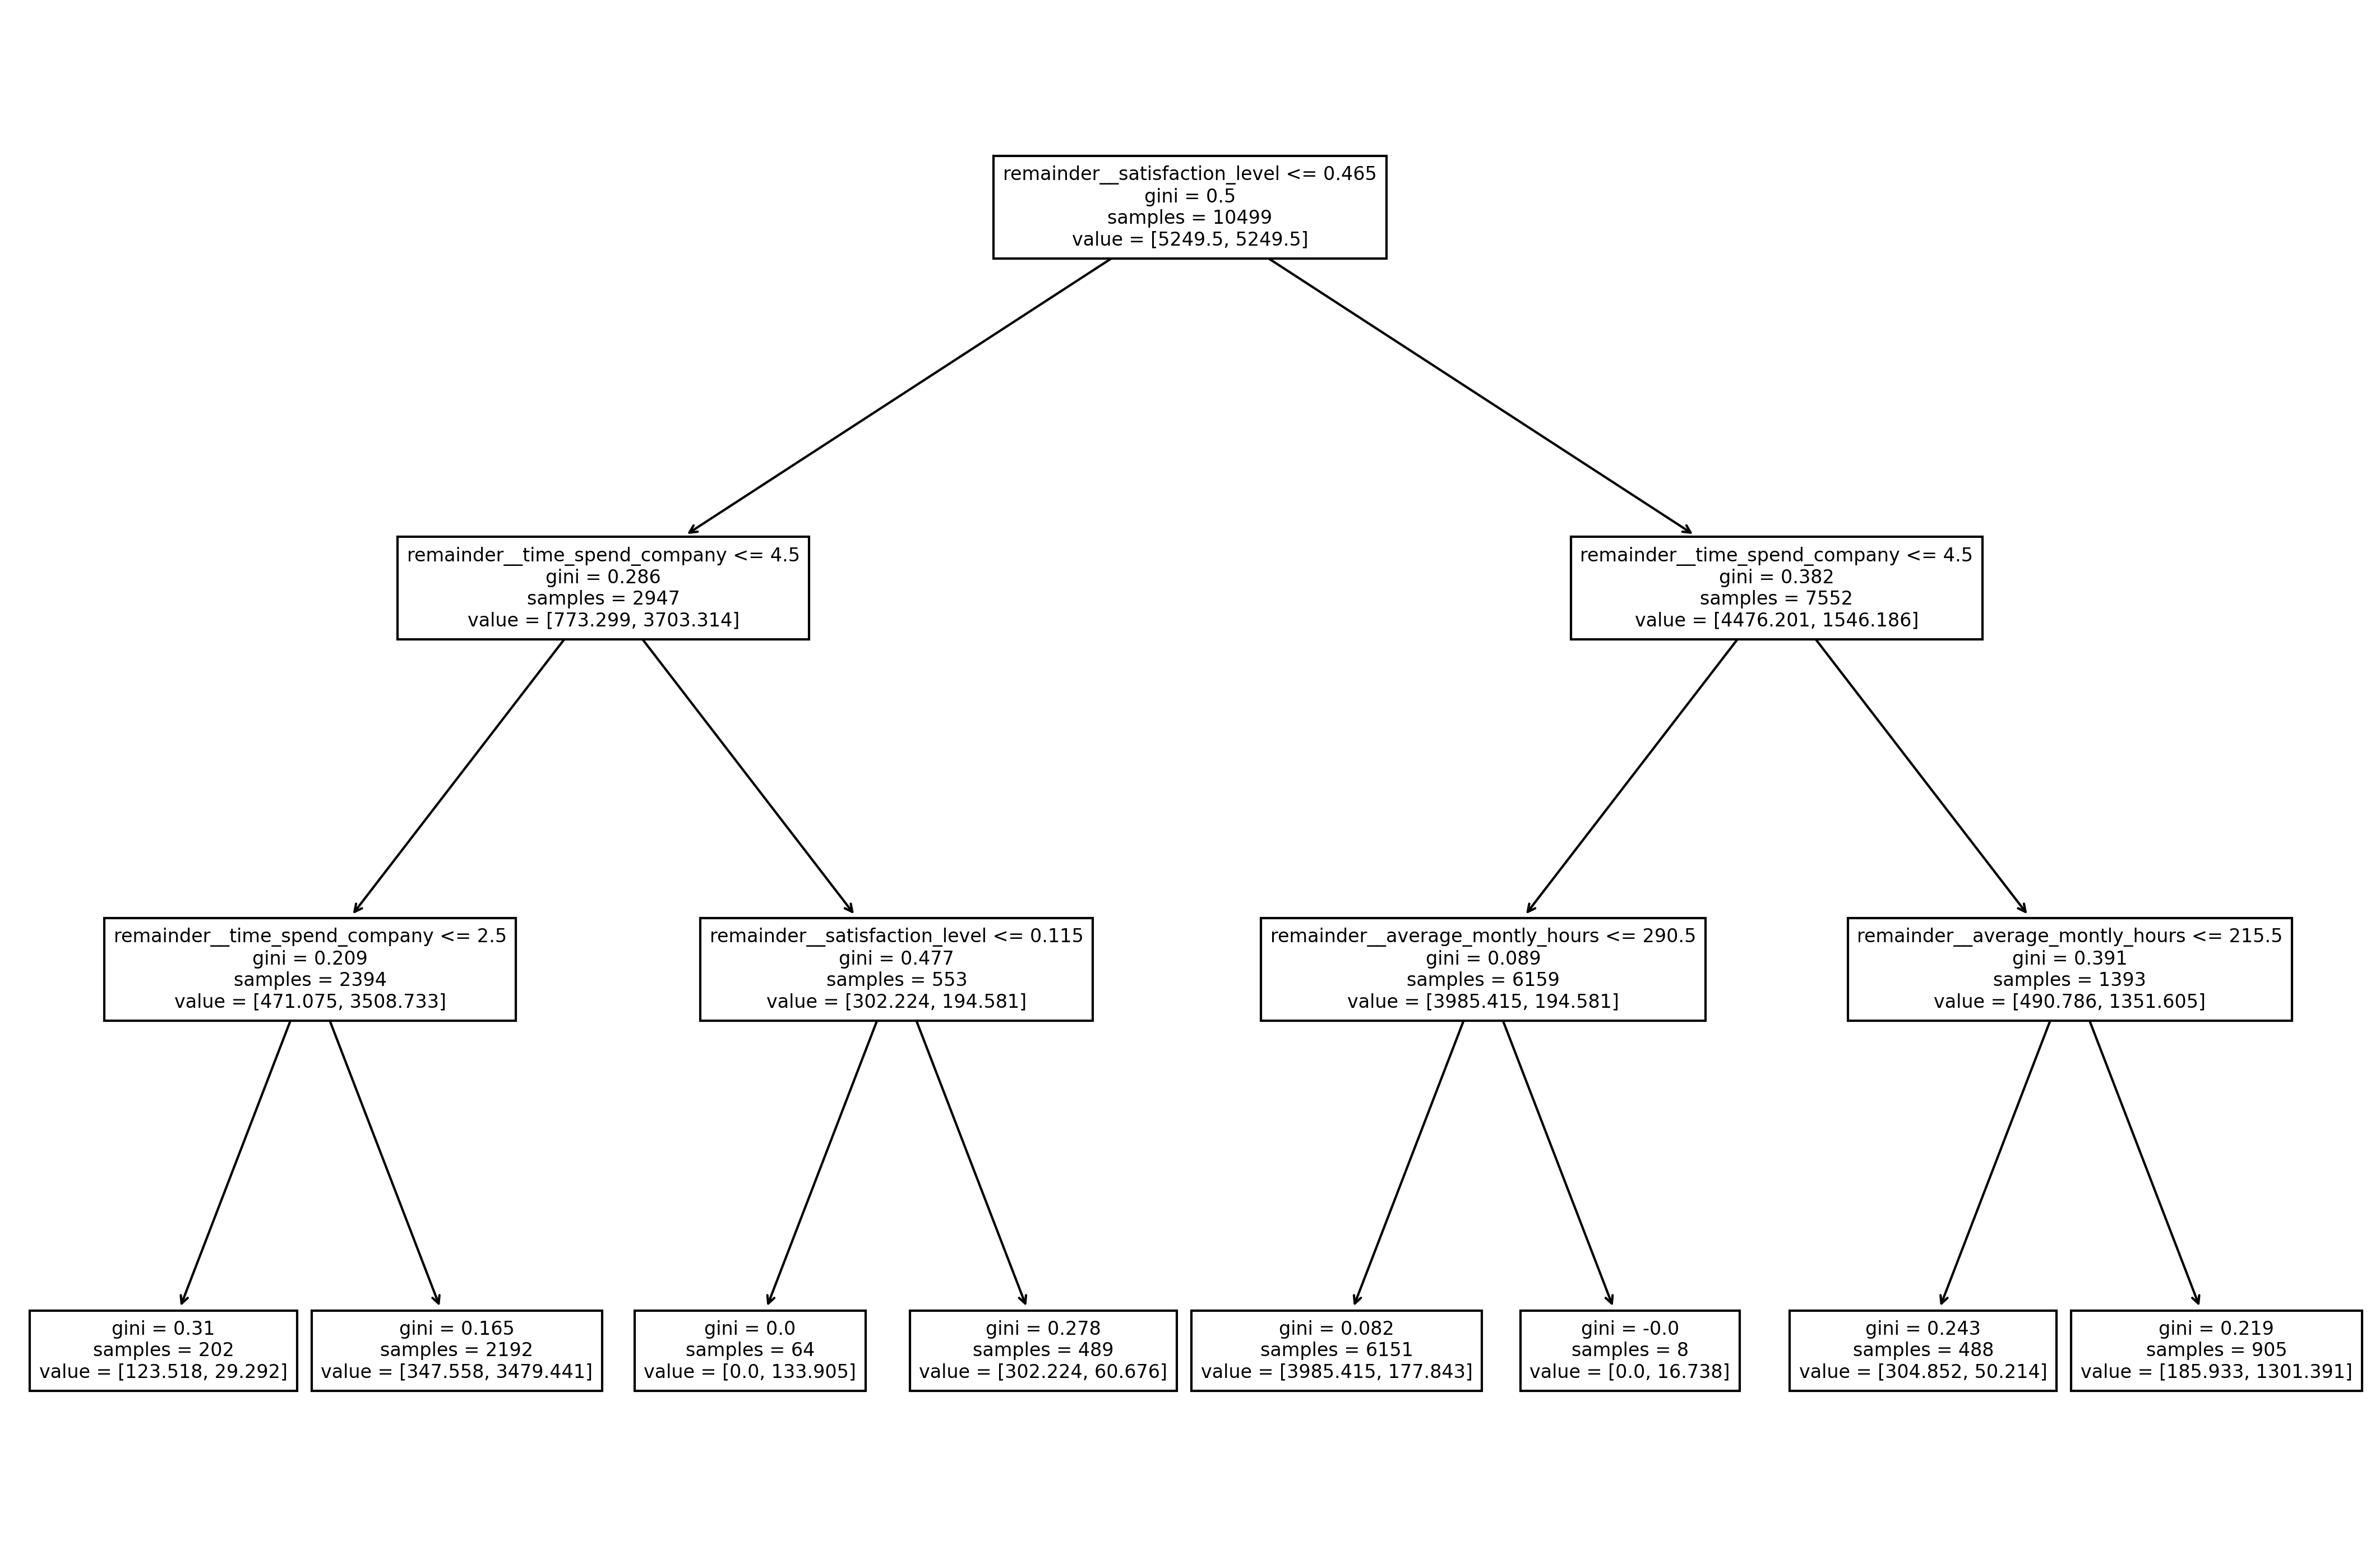

In [134]:
plt.figure(figsize=(18, 12), dpi=300)
plot_tree(clf['decisiontreeclassifier'], feature_names=preprocessor.get_feature_names_out(), fontsize=8);

In [68]:
y_predict = clf.predict(x_test)

# Measure the accuracy of the model

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.46      0.60      3438
           1       0.30      0.74      0.42      1062

    accuracy                           0.53      4500
   macro avg       0.57      0.60      0.51      4500
weighted avg       0.72      0.53      0.56      4500



## Conclusion: 

The model has accurancy of 0.53 and the variables satisfaction_level, time_spend_company and average_monthy_hours are most significant to assess the permanence of an employee in the company.